# Rice Analysis Using Convolutional Neural Network Technique

The following code will analyze deep learning using CNN techniques in predicting rice plant diseases namely Bercak Coklat, Blast, Hawar daun bakteri, and Tungro.

### Connect to Drive

In [1]:
# This is used to connect colab with google drive.

gcolab = 1
if gcolab:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


Split the dataset into different subsets/subfolders. This is useful in tasks such as splitting a dataset into training, validation, and testing sets.

In [2]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 126.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    F

### Import Library

Import some libraries to support the model running

In [4]:
import os
import shutil
import splitfolders
import numpy as np
import seaborn as sns
import time
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import load_model
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

### Data Preparation

In this case, we used 20% of the data from all images with a total of 1189 images collected. After that, the data is divided into 0.70 train data and 0.30 test data. Data source from [Kaggle](https://www.kaggle.com/datasets/shareef0612/riceleaf-dataset).



In [5]:
# Create a directory to contain the entire dataset

os.mkdir("./Data Penyakit Padi/")
splitfolders.ratio("/content/drive/MyDrive/Project ML/Penyakit Padi", output="./Data Penyakit Padi", seed=2023, ratio=(.22, .78), group_prefix=None)

Copying files: 5950 files [01:27, 67.64 files/s] 


In [6]:
output_folder = "./Data Penyakit Padi"

# Calculating the amount of training data
train_folder = os.path.join(output_folder, "train")
num_train_samples = sum(len(files) for _, _, files in os.walk(train_folder))

# Counting the number of validation data
val_folder = os.path.join(output_folder, "val")
num_val_samples = sum(len(files) for _, _, files in os.walk(val_folder))

# Display the number of training data and validation data
print("The amount of training data:", num_train_samples)
print("The amount of validation data:", num_val_samples)


The amount of training data: 1307
The amount of validation data: 4643


In [7]:
# Create a directory of the previous train data as the data to be analyzed

splitfolders.ratio("./Data Penyakit Padi/train", output="./Data Penyakit Padi Fix", seed=2023, ratio=(.75, .25), group_prefix=None)

Copying files: 1307 files [00:00, 7802.84 files/s]


In [ ]:
# To remove a directory

# folder_path = "/content/Data Penyakit Padi"
# shutil.rmtree(folder_path)

In [8]:
bercakCoklat_train_dir = "./Data Penyakit Padi Fix/train/Bercak Coklat"
Blast_train_dir = "./Data Penyakit Padi Fix/train/Blast"
hawardaunbakteri_train_dir = "./Data Penyakit Padi Fix/train/Hawar daun bakteri"
tungro_train_dir = "./Data Penyakit Padi Fix/train/Tungro"

bercakCoklat_val_dir = "./Data Penyakit Padi Fix/val/Bercak Coklat"
Blast_val_dir = "./Data Penyakit Padi Fix/val/Blast"
hawardaunbakteri_val_dir = "./Data Penyakit Padi Fix/val/Hawar daun bakteri"
tungro_val_dir = "./Data Penyakit Padi Fix/val/Tungro"

In [9]:
print('total training bercak coklat images :', len(os.listdir(      bercakCoklat_train_dir) ))
print('total training Blast images :', len(os.listdir(      Blast_train_dir ) ))
print('total training hawar daun bakteri images :', len(os.listdir(      hawardaunbakteri_train_dir ) ))
print('total training tungro images :', len(os.listdir(      tungro_train_dir ) ))

total training bercak coklat images : 264
total training Blast images : 237
total training hawar daun bakteri images : 262
total training tungro images : 216


In [10]:
print('total validation bercak coklat images :', len(os.listdir( bercakCoklat_val_dir ) ))
print('total validation Blast images :', len(os.listdir( Blast_val_dir ) ))
print('total validation hawar daun bakteri images :', len(os.listdir( hawardaunbakteri_val_dir ) ))
print('total validation tungro images :', len(os.listdir( tungro_val_dir ) ))

total validation bercak coklat images : 88
total validation Blast images : 79
total validation hawar daun bakteri images : 88
total validation tungro images : 73


Displays 4 random images of each rice disease

In [11]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Sample Bercak Coklat image:


<Figure size 640x480 with 0 Axes>

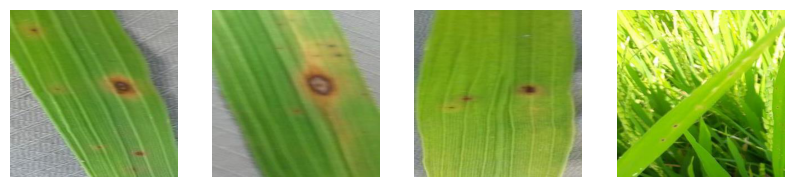

Sample Blast image:


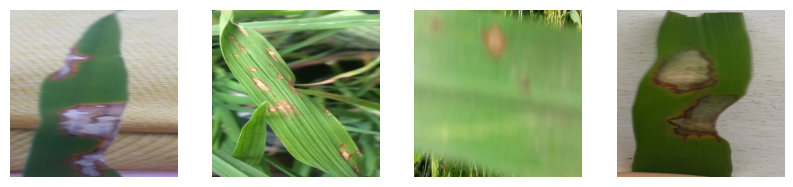

Sample Hawar daun Bakteri image:


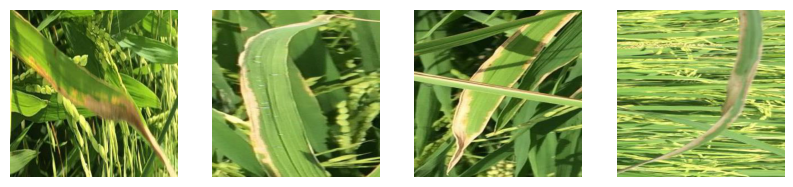

Sample tungro image:


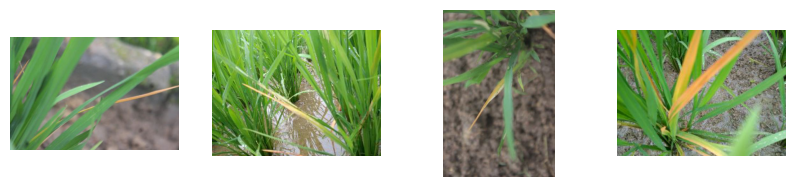

In [15]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
pic_index += 4

# Bercak Coklat
print("Sample Bercak Coklat image:")
next_bercakcoklat_pic = [os.path.join(bercakCoklat_train_dir, fname) 
                         for fname in os.listdir(bercakCoklat_train_dir)[pic_index-4:pic_index]]
fig = plt.figure(figsize=(10, 10))

for i, img_path in enumerate(next_bercakcoklat_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img) 

plt.show()

# Blast
print("Sample Blast image:")
next_blast_pic = [os.path.join(Blast_train_dir, fname) 
                  for fname in os.listdir(Blast_train_dir)[pic_index-4:pic_index]]
fig = plt.figure(figsize=(10, 10))

for i, img_path in enumerate(next_blast_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img) 

plt.show()

# Hawar daun Bakteri
print("Sample Hawar daun Bakteri image:")
next_hawar_pic = [os.path.join(hawardaunbakteri_train_dir, fname) 
                  for fname in os.listdir(hawardaunbakteri_train_dir)[pic_index-4:pic_index]]
fig = plt.figure(figsize=(10, 10))

for i, img_path in enumerate(next_hawar_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Tungro
print("Sample tungro image:")
next_tungro_pic = [os.path.join(tungro_train_dir, fname) 
                  for fname in os.listdir(tungro_train_dir)[pic_index-4:pic_index]]
fig = plt.figure(figsize=(10, 10))

for i, img_path in enumerate(next_tungro_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img) 

plt.show()



Implemented data augmentation using ImageDataGenerator class to prepare train and validation data containing 4 diseases to be analyzed.

In [24]:
Training_dir = './Data Penyakit Padi Fix/train'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(Training_dir,
                                                    batch_size=12,
                                                    class_mode='categorical',
                                                    target_size=(150, 150)) 
Validation_dir = './Data Penyakit Padi Fix/val'
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(Validation_dir,
                                                              batch_size=12,
                                                              class_mode  = 'categorical',
                                                              target_size = (150, 150))

Found 979 images belonging to 4 classes.
Found 328 images belonging to 4 classes.


### Data Modeling

In this model, the transfer learning technique inceptionV3 is used. The InceptionV3 model is pre-trained (imagenet dataset) and removes the fully connected layers at the end. After that, it iterates over each layer in the pre-trained model and sets the trainable attribute to False. This will prevent the layers from being retrained during the transfer learning process. Then, prepare the input to the model, and take the pre-trained weights in inceptionV3 to classify 4 different classes of Brown Spot, Blast, Bacterial leaf blight, and Tungro.

In [32]:
# Creating transfer learning with inceptionV3 model
pre_trained_model_4desease = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = "imagenet")

# Set the pre-trained layer to be untrainable
for layer in pre_trained_model_4desease.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 0s 0us/step


In [33]:
inputs3 = pre_trained_model_4desease.input
x4 = tf.keras.layers.Flatten()(pre_trained_model_4desease.output)
x4 = tf.keras.layers.Dense(512, activation='relu')(x4)
x4 = tf.keras.layers.BatchNormalization()(x4)
x4 = tf.keras.layers.Dropout(0.3)(x4)
x4 = tf.keras.layers.Dense(256, activation='relu')(x4)
x4 = tf.keras.layers.BatchNormalization()(x4)
x4 = tf.keras.layers.Dropout(0.1)(x4)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x4)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

# Create a new sequential model
#model = tf.keras.models.Sequential()
# Adding the pre-trained model to the sequential model
#model.add(pre_trained_model_4desease)
# Adding models
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(512, activation='relu')) 
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.3)) 
#model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.1)) 
#model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [35]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_192 (Batch  (None, 74, 74, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [36]:
# Create accuracy with adam optimizer and categorical_crossentropy

model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

### Training Model

We will train the model for 60 epochs (Accuracy = 0.9267 and val_accuracy = 0.9543 )

In [37]:
# Setting up checkpoints to save the best models

sourcedata = "/content/drive/MyDrive/Project ML/checkpoint_fix"

if not os.path.exists(sourcedata):  # Check if the directory already exists before creating it
    os.mkdir(sourcedata)

checkpoint = ModelCheckpoint(sourcedata, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [38]:
start_time = time.time()
# Perform iterations
callbacks_list = [checkpoint]
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=25, epochs=65, callbacks=[callbacks_list])

# Calculates the time required in iterations
duration = time.time() - start_time
minutes = duration // 60
seconds = duration % 60
print("Run time : {:.0f}:{:.0f}".format(minutes, seconds))

Epoch 1/65
25/25 [==============================] - ETA: 0s - loss: 1.3502 - accuracy: 0.5233
Epoch 1: val_accuracy improved from -inf to 0.64634, saving model to /content/drive/MyDrive/Project ML/checkpoint_fix
25/25 [==============================] - 53s 2s/step - loss: 1.3502 - accuracy: 0.5233 - val_loss: 0.9836 - val_accuracy: 0.6463
Epoch 2/65
25/25 [==============================] - ETA: 0s - loss: 0.7610 - accuracy: 0.7051
Epoch 2: val_accuracy improved from 0.64634 to 0.70427, saving model to /content/drive/MyDrive/Project ML/checkpoint_fix
25/25 [==============================] - 47s 2s/step - loss: 0.7610 - accuracy: 0.7051 - val_loss: 0.8603 - val_accuracy: 0.7043
Epoch 3/65
25/25 [==============================] - ETA: 0s - loss: 0.6295 - accuracy: 0.7800
Epoch 3: val_accuracy improved from 0.70427 to 0.82927, saving model to /content/drive/MyDrive/Project ML/checkpoint_fix
25/25 [==============================] - 47s 2s/step - loss: 0.6295 - accuracy: 0.7800 - val_loss: 0

### Plot accuracy and loss

Here, we are going to evaluate the results with plot the accuracy, validation accuray, loss and validation loss results of model training before


Text(0.5, 1.0, 'Training and validation loss')

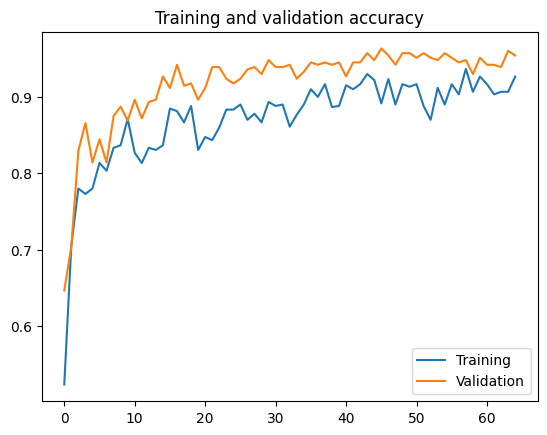

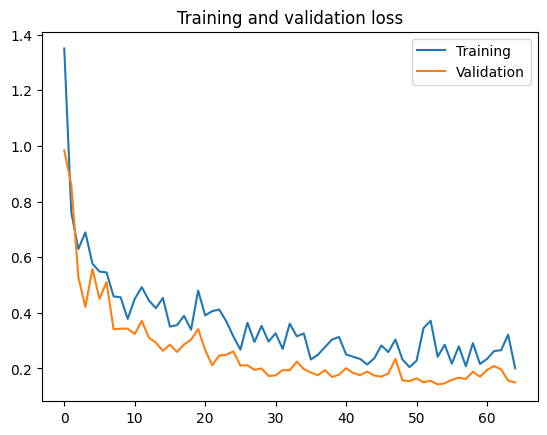

In [39]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss'   )

### Load best model weight

Here, we load the weights from the previously saved model into the current model.

In [40]:
model.load_weights('/content/drive/MyDrive/Project ML/checkpoint_fix')

### Evaluate model accuracy

Evaluate the model against the model that has been made before. (Model evaluate = 0.9634)

In [41]:
model.evaluate(validation_generator)

28/28 [==============================] - 11s 395ms/step - loss: 0.1708 - accuracy: 0.9634


[0.17079785466194153, 0.9634146094322205]

### Test prediction model

Now we try to run a prediction using the created model. The code will choose between "Bercak Coklat", "Blast", "Hawar daun bakteri", and "Tungro" if we upload an image from the system file and run it.

In [53]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  x /= 255.0
  prob = model.predict(x)
  classes = np.argmax(prob)

  if classes == 0:
    print("Ini adalah penyakit Bercak Coklat")
    print(" ")
    print("Penyakit Bercak Coklat adalah penyakit yang disebakan oleh jamur Helmintosporium oryzae pada pertanaman")
    print("Cendawan ini memiliki inang yang luas serta gampang tersebar. Penyakit ini mengakibatkan kehilangan produksi mencapai 50-91%.")
    print(" ")
    print("Cara pengendalian penyakit ini adalah sanitasi kebun, mengurangi kelembaban, daun-daun bawah yang terinfeksi secepatnya diambil agar tidak menjadi sumber penularan, ") 
    print("pemanenan tepat waktu, eradikasi tanaman yang sakit, peyemprotan dengan fungisida berbahan aktif Mancozeb, Captan, Captafol, Metil tiofanat, Benomil , Antracol.")
    print("Sebaiknya digunakan secara  bergantian untuk menghindari resistensi. ")

  elif classes == 1:
    print("Ini adalah penyakit Blast")
    print(" ")
    print("Penyakit Blast adalah penyakit yang disebabkan oleh jamur Pyricularia oryzae. Patogen bisa berasal dari benih, sisa tanaman sakit maupun rumput rumputan di sekitar tanaman. Penularan oleh angin.") 
    print("Faktor yang mempengaruhi yaitu varietas, kekurangan Kalium dan Silica,  kekurangan air, dan stress tanaman akibat herbisida. ")
    print(" ")
    print("Cara pengendalian penyakit ini adalah pertama, perbanyak pupuk kandang dan pupuk hijau. Kedua, upayakan kecukupan kalium, baik dengan pupuk buatan seperti KCl, maupun abu bakaran kayu, abu gosok, abu sekam.") 
    print("Ketiga, menghindari penggunaan herbisida, karena meningkatkan kerentanan terhadap blast. Keempat, penggunaan PGPR , pilih isolat/strain yg terbukti efektif. untuk memperkuat tanaman. ")
    print("Terakhir, aplikasi teh kompos terutama pada tanaman muda.")

  elif classes == 2:
    print("Ini adalah penyakit Hawar Daun Bakteri")
    print(" ")
    print("Penyakit Hawar daun bakteri adalah penyakit yang disebabkan oleh bakteri Xanthomonas campestris pv. Oryzae dan dapat menurunkan hasil sampai 30%. ")
    print("Penyakit ini banyak terjadi pada musim hujan atau kemarau yang basah terutama pada lahan sawah yang selalu tergenang, dan dipupuk N tinggi (≥ 250 kg Urea / ha). ")
    print(" ")
    print("Cara pengendalian penyakit ini adalah bibit padi yang ditanam tidak dipotong pada bagian ujungnya, jarak tanam jangan terlalu rapat, disarankan dengan cara tanam jejer legowo, pengairan berselang (intermiten) hindari penggenangan yang terus-menerus,")
    print("pemupukan berimbang jangan terlalu banyak pupuk N, dan jika intensitas penyakit melebihi 20% maka semprot dengan bakterisida.")

  else:
    print("Ini adalah penyakit Tungro")
    print(" ")
    print("Penyakit Tungro adalah penyakit virus pada padi yang biasanya menyerang pada fase pertumbuhan vegetatif dan menyebabkan tanaman tumbuh kerdil dan berkurangnya jumlah anakan. Pelepah dan helaian daun memendek dan daun yang terserang sering berwarna kuning sampai kuning-oranye.")
    print("Dua spesies wereng hijau Nephotettix malayanus dan N.virescens adalah serangga utama yang menyebarkan virus tungro. Tungro adalah satu dari penyakit padi yang paling merusak. ")
    print(" ")
    print("Cara pengendalian penyakit ini adalah penggunaan varietas tahan seperti Tukad Unda, Tukad Balian merupakan cara terbaik untuk mengendalikan tungro. Pembajakan di bawah sisa tunggul yang terinfeksi.")
    print("Hal ini dilakukan untuk mengurangi sumber penyakit dan menghancurkan telur dan tempat penetasan wereng hijau. Bajak segera setelah panen bila tanaman sebelum-nya terserang penyakit. Membuang tanaman yang terinfeksi, tanam benih secara langsung (Tabela), ")
    print("tanam padi saat insiden wereng hijau dan tungro rendah. Upayakan petani tanam serempak, ini mengurangi penyebaran tungro dari satu bidang lahan ke lahan lainnya yang melakukan tanam kemudian.")
    print("Bila terpaksa menggunakan insektisida gunakan yang berbahan aktif BPMC, buprofezin, etofenproks, imidakloprid, karbofuran, MIPC, atau tiametoksam. ")

Saving TUNGRO2_002.jpg to TUNGRO2_002.jpg
Ini adalah penyakit Tungro
 
Penyakit Tungro adalah penyakit virus pada padi yang biasanya menyerang pada fase pertumbuhan vegetatif dan menyebabkan tanaman tumbuh kerdil dan berkurangnya jumlah anakan. Pelepah dan helaian daun memendek dan daun yang terserang sering berwarna kuning sampai kuning-oranye.
Dua spesies wereng hijau Nephotettix malayanus dan N.virescens adalah serangga utama yang menyebarkan virus tungro. Tungro adalah satu dari penyakit padi yang paling merusak. 
 
Cara pengendalian penyakit ini adalah penggunaan varietas tahan seperti Tukad Unda, Tukad Balian merupakan cara terbaik untuk mengendalikan tungro. Pembajakan di bawah sisa tunggul yang terinfeksi.
Hal ini dilakukan untuk mengurangi sumber penyakit dan menghancurkan telur dan tempat penetasan wereng hijau. Bajak segera setelah panen bila tanaman sebelum-nya terserang penyakit. Membuang tanaman yang terinfeksi, tanam benih secara langsung (Tabela), 
tanam padi saat insid

### Save model

Convert model to .h5 format in order to deploying model.

In [54]:
saved_model_path = "/content/drive/MyDrive/Project ML/rice_4desease_9553.h5"

model.save(saved_model_path)

In the end, we will save the trained model to the [drive](https://drive.google.com/drive/folders/1XJZb0_AQupBfgZ2Hr0lXY4lsBRywJZ4N).
